In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Planning: Main Objective

To practice Exploratory Data Analysis and Data Visualization by understanding the overall distribution of data through visualizations while potentially investigating whether it relates to overall salary to better inform students who are looking for data science-related jobs

## 2. Gathering/Reading Data 

Data scraped by RUCHI BHATIA's Data Science Job Salaries dataset from Kaggle (https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

In [2]:
df = pd.read_csv('C:/Users/leena/personal_proj/data_salary_proj/ds_salaries.csv')

## 3. Cleaning Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [4]:
df.shape

(607, 12)

In [5]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
df = df.drop(['salary', 'salary_currency'], axis = 1)

In [7]:
df.isnull().sum() # no null vals! 

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
# renaming employment type cell
df.loc[df['employment_type'] == 'FL', 'employment_type'] = 'Full Time'
df.loc[df['employment_type'] == 'PT', 'employment_type'] = 'Part Time'
df.loc[df['employment_type'] == 'CT', 'employment_type'] = 'Contract'
df.loc[df['employment_type'] == 'FL', 'employment_type'] = 'Freelance'


## 3. EDA: Understanding Data Distribution

## Univariate Analysis

### Employee Residence

C:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

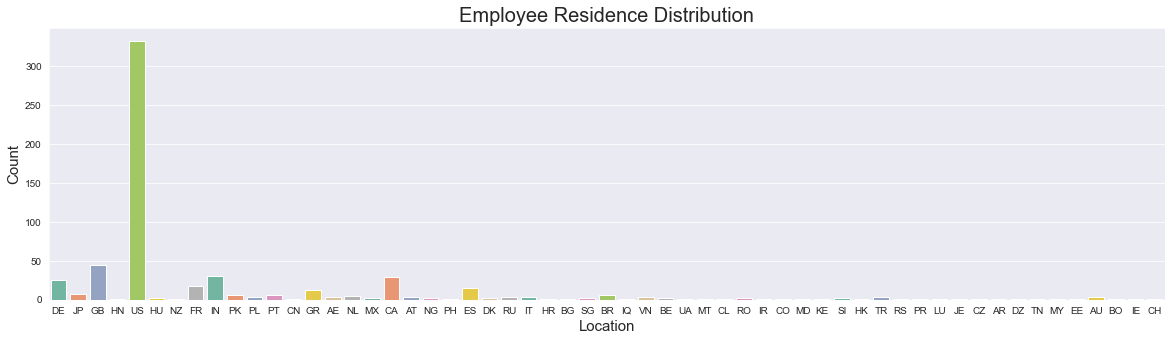

In [51]:
plt.figure(figsize=(20,5))
sns.set_style('darkgrid')
sns.countplot(df['employee_residence'], palette='Set2')
plt.title('Employee Residence Distribution', fontsize = 20)
plt.xlabel('Location', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

**Key Takeaway:** Most employees are in the US, most likely because most company work locations are in the US.

### Company Location

C:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

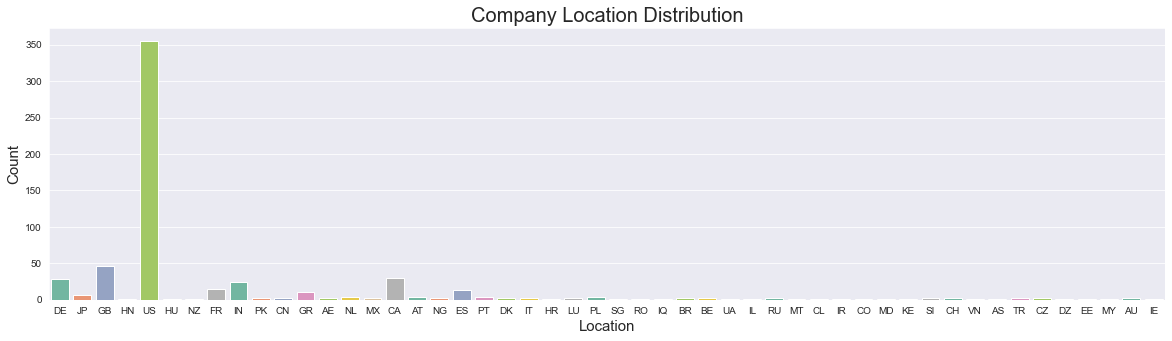

In [86]:
plt.figure(figsize=(20,5))
sns.set_style('darkgrid')
sns.countplot(df['company_location'], palette='Set2')
plt.title('Company Location Distribution', fontsize = 20)
plt.xlabel('Location', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

**Key Takeaway:** As expected, most companies are located in the US. The discrepancy between employee residence and company location is most likely due to the jobs that are entirely remote (or, has a remote ratio of 100)

### Remote Ratio

C:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

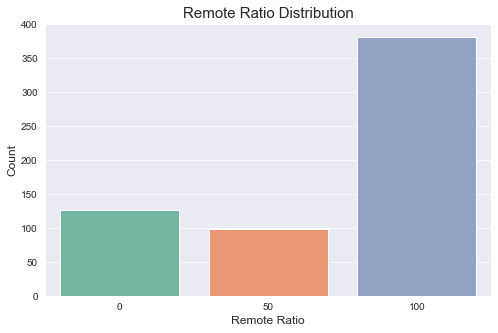

In [54]:
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')

sns.countplot(df['remote_ratio'], palette='Set2')
plt.title('Remote Ratio Distribution', fontsize = 15)
plt.xlabel('Remote Ratio', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

**Key Takeaway:** Majority of jobs are entirely remote, and second to that, is entirely in-person. But, lets see how this has changed over the work years

#### Remote Ratio Each Work Year

In [80]:
df1 = df[df['work_year'] == 2020]
df2 = df[df['work_year'] == 2021]
df3 = df[df['work_year'] == 2022]

C:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

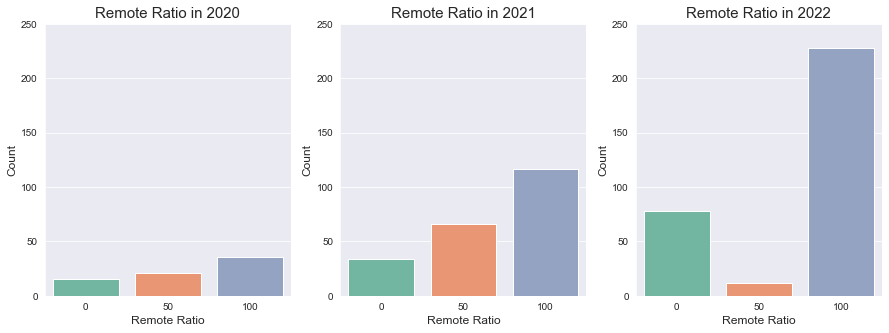

In [83]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(df1['remote_ratio'], palette='Set2')
plt.title('Remote Ratio in 2020', fontsize = 15)
plt.xlabel('Remote Ratio', fontsize = 12)
plt.ylim(0,250)
plt.ylabel('Count', fontsize = 12)

plt.subplot(1,3,2)
sns.countplot(df2['remote_ratio'], palette='Set2')
plt.title('Remote Ratio in 2021', fontsize = 15)
plt.xlabel('Remote Ratio', fontsize = 12)
plt.ylim(0,250)
plt.ylabel('Count', fontsize = 12)

plt.subplot(1,3,3)
sns.countplot(df3['remote_ratio'], palette='Set2')
plt.title('Remote Ratio in 2022', fontsize = 15)
plt.xlabel('Remote Ratio', fontsize = 12)
plt.ylim(0,250)
plt.ylabel('Count', fontsize = 12)

**Key Takeaway:** For all three years most jobs were entirely remote, but by 2022 there has been a significant decrease in hyrbid jobs and a much larger proportion of completely remote jobs. This is possibly due to the the current transition to remote jobs, and having entirely remote jobs allows more people globally apply for these jobs. Also note the overall increase in counts as the year progressed.

### Company Size

C:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

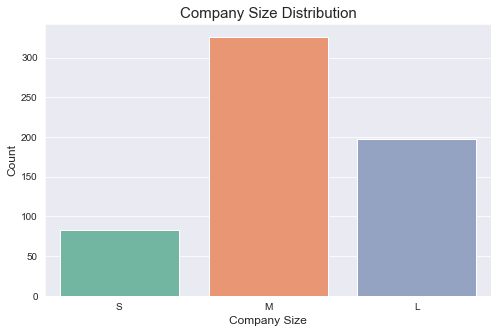

In [89]:
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.countplot(df['company_size'], order = ['S', 'M', 'L'], palette='Set2')
plt.title('Company Size Distribution', fontsize = 15)
plt.xlabel('Company Size', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

**Key Takeaway:** Most companies are considered medium sized, but lets observe whether company size plays a role in average salary over the work years.

#### Company Size and Salary Over Time

In [92]:
small = df[df['company_size'] == 'S']
medium = df[df['company_size'] == 'M']
large = df[df['company_size'] == 'L']

C:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for

Text(0, 0.5, 'Density')

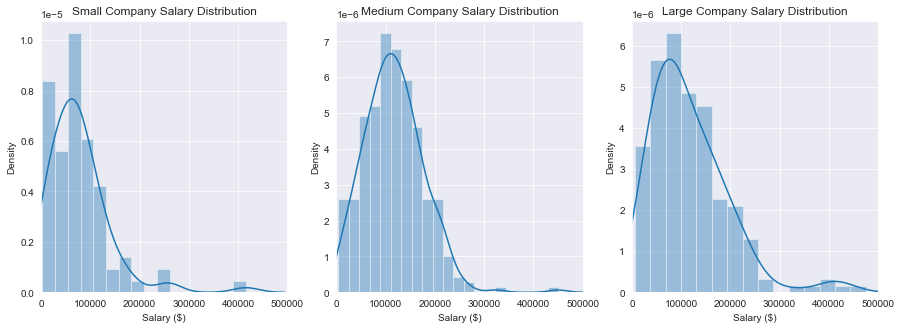

In [98]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.distplot(small.salary_in_usd)
plt.title('Small Company Salary Distribution', fontsize = 12)
plt.xlim(0, 500000)
plt.xlabel('Salary ($)', fontsize = 10)
plt.ylabel('Density', fontsize = 10)

plt.subplot(1,3,2)
sns.distplot(medium.salary_in_usd)
plt.title('Medium Company Salary Distribution', fontsize = 12)
plt.xlim(0, 500000)
plt.xlabel('Salary ($)', fontsize = 10)
plt.ylabel('Density', fontsize = 10)

plt.subplot(1,3,3)
sns.distplot(large.salary_in_usd)
plt.title('Large Company Salary Distribution', fontsize = 12)
plt.xlim(0, 500000)
plt.xlabel('Salary ($)', fontsize = 10)
plt.ylabel('Density', fontsize = 10)

**Key Takeaway:** There isn't a significant change in distribution shape of salary based on size of company. Bo

### Employment Type

C:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

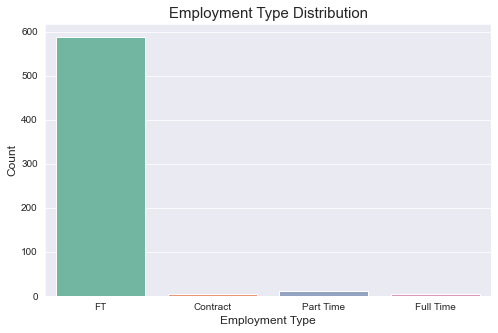

In [10]:
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.countplot(df['employment_type'], palette='Set2')
plt.title('Employment Type Distribution', fontsize = 15)
plt.xlabel('Employment Type', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

**Key Takeaway:** Majority of workers are full time workers in the Data Science Field

### Salary 

C:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

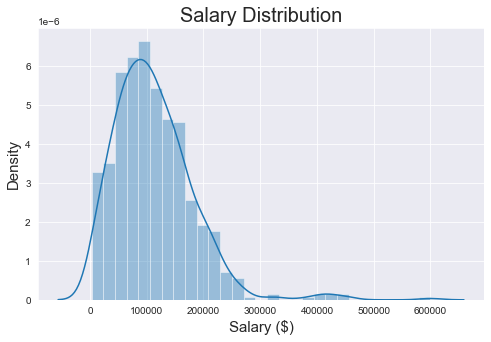

In [11]:
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.distplot(df.salary_in_usd)
plt.title('Salary Distribution', fontsize = 20)
plt.xlabel('Salary ($)', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

**Key Takeaway:** Most salaries for these jobs seem to average around $100000. Histrogram is unimodal, and slightly right skewed with a few outliers towards the right.

###  Work Years

C:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

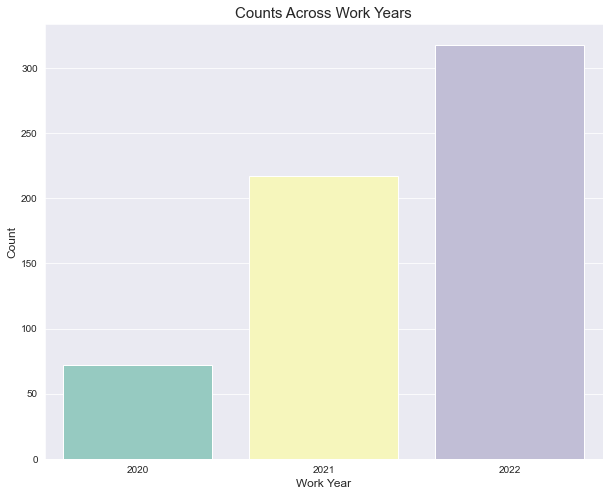

In [12]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.countplot(df['work_year'], palette='Set3')
plt.title('Counts Across Work Years', fontsize = 15)
plt.xlabel('Work Year', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

In [13]:
df['Count'] = 1
work_year = df.groupby(['work_year']).sum().reset_index()
work_year

,work_year,Unnamed: 0,salary_in_usd,remote_ratio,Count
0,2020,2556,6898536,4650,72
1,2021,39060,21668273,15000,217
2,2022,142305,39597998,23400,318


In [14]:
year1 = work_year.at[0, 'Count']
year2 = work_year.at[1, 'Count']
year3 = work_year.at[2, 'Count']

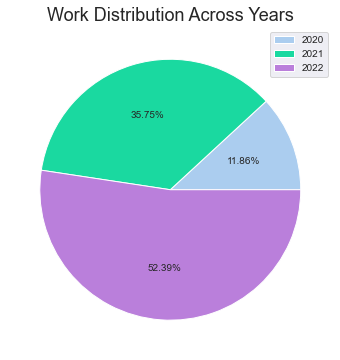

In [15]:
years = [year1, year2, year3]
colors = ['#abcdef','#1ad9a0', '#ba7fdb']
labels = ['2020', '2021', '2022']

plt.figure(figsize=(6,6))

plt.pie(years, colors = colors, autopct = '%.2f%%' )
plt.legend(labels)
plt.title('Work Distribution Across Years', fontsize = 18)
plt.show()

**Key Takeaways:** More people got data science related jobs as the years progressed. This is possible due to the overall rise in demand for data science roles as Big Data continues to grow in the world

#### Work Years and Salary

Text(0, 0.5, 'Count')

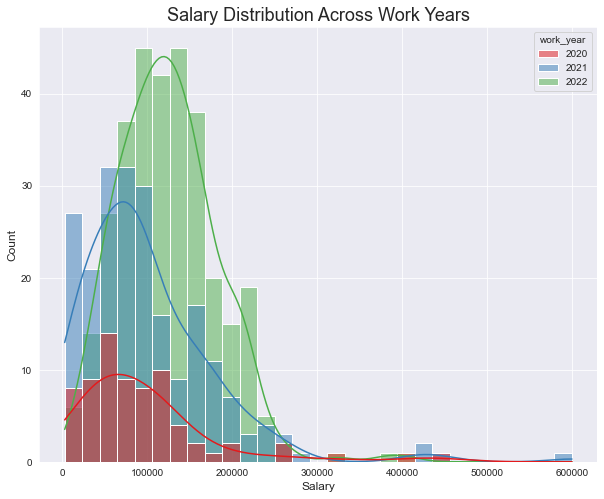

In [16]:
plt.figure(figsize=(10,8))

sns.set_style('darkgrid')
sns.histplot(data = df, x = 'salary_in_usd', hue = 'work_year', palette='Set1', kde = True)
plt.title('Salary Distribution Across Work Years', fontsize = 18)
plt.xlabel('Salary', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

**Key Takeaways:** Datapoints from this dataset are from people who started working in these data science jobs in the year of 2022. This could be due to the higher demand of the job, which is suggested by its increased overall salary over time.

### Job Titles

In [17]:
df['job_title'].value_counts()  

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [18]:
df['occupation_type'] = df['job_title'].map(lambda x: x.split(' ')[-1])

# to categorize 'manager', 'head', 'specialist', 'lead', 'director' to Leader category
df.loc[df['job_title'].map(lambda x: 'Head' in x),'occupation_type'] = 'Leader'
df.loc[df['job_title'].map(lambda x: 'Specialist' in x),'occupation_type'] = 'Leader'
df.loc[df['job_title'].map(lambda x: 'Lead' in x),'occupation_type'] = 'Leader'
df.loc[df['job_title'].map(lambda x: 'Director' in x),'occupation_type'] = 'Leader'


df['occupation_type'].value_counts()

Engineer      216
Scientist     191
Analyst       116
Leader         34
Manager        25
Architect      12
Consultant      7
Developer       5
Researcher      1
Name: occupation_type, dtype: int64

In [19]:
df.groupby(['occupation_type']).sum()

,Unnamed: 0,work_year,salary_in_usd,remote_ratio,Count
occupation_type,,,,,
Analyst,38632,234501,10814236,8750,116
Architect,4552,24260,2056316,1150,12
Consultant,966,14145,485945,500,7
Developer,1821,10109,367496,250,5
Engineer,66975,436633,23644436,15600,216
Leader,6990,68717,5264179,2250,34
Manager,6417,50530,3523122,2000,25
Researcher,77,2021,5409,50,1
Scientist,57491,386077,22003668,12500,191


C:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

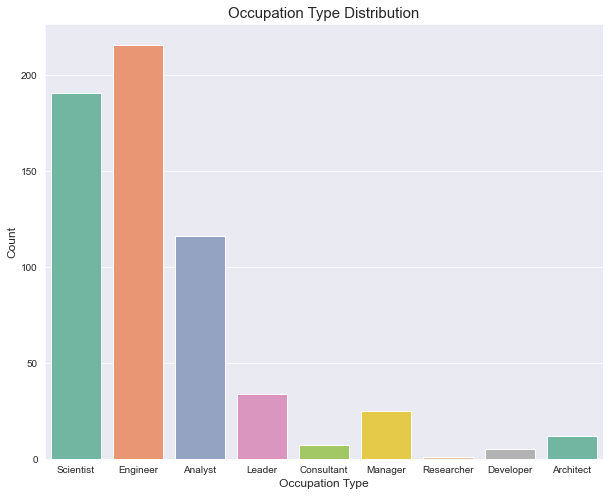

In [20]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.countplot(df['occupation_type'], palette='Set2')
plt.title('Occupation Type Distribution', fontsize = 15)
plt.xlabel('Occupation Type', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

**Key Takeaway:** Having job titles with the word "Director", "Head", "Specialist", and "Lead" categorized as "Leader", most people are either (Data) Scientists, Engineers, or Analysts. These three titles make up most of the job titles in this dataset.

### Experience Level

In [21]:
df['experience_level'].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [22]:
# renaming
df.loc[df['experience_level'] == 'SE', 'experience_level'] = 'Senior'
df.loc[df['experience_level'] == 'MI', 'experience_level'] = 'Mid'
df.loc[df['experience_level'] == 'EN', 'experience_level'] = 'Entry'
df.loc[df['experience_level'] == 'EX', 'experience_level'] = 'Expert'

C:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

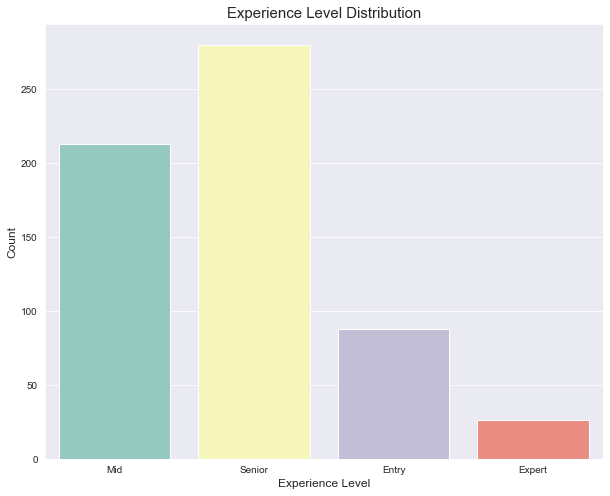

In [23]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.countplot(df['experience_level'], palette='Set3')
plt.title('Experience Level Distribution', fontsize = 15)
plt.xlabel('Experience Level', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

**Key Takeaway:** Most people are have either a Senior or Intermediate/Middle experience level in this dataset.

## 4. EDA: Observations Using Groupby

### 1. Common Job Titles EDA

In [24]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Count,occupation_type
0,0,2020,Mid,FT,Data Scientist,79833,DE,0,DE,L,1,Scientist
1,1,2020,Senior,FT,Machine Learning Scientist,260000,JP,0,JP,S,1,Scientist
2,2,2020,Senior,FT,Big Data Engineer,109024,GB,50,GB,M,1,Engineer
3,3,2020,Mid,FT,Product Data Analyst,20000,HN,0,HN,S,1,Analyst
4,4,2020,Senior,FT,Machine Learning Engineer,150000,US,50,US,L,1,Engineer


In [25]:
df['Count'] = 1
common_job = df.groupby('job_title').sum(['Count'])
common_job = common_job['Count'].reset_index()
common_job = common_job.sort_values(['Count'], ascending = False).reset_index().head(10)
common_job = common_job.drop(['index'], axis = 1)
common_job

,job_title,Count
0,Data Scientist,143
1,Data Engineer,132
2,Data Analyst,97
3,Machine Learning Engineer,41
4,Research Scientist,16
5,Data Science Manager,12
6,Data Architect,11
7,Big Data Engineer,8
8,Machine Learning Scientist,8
9,Director of Data Science,7


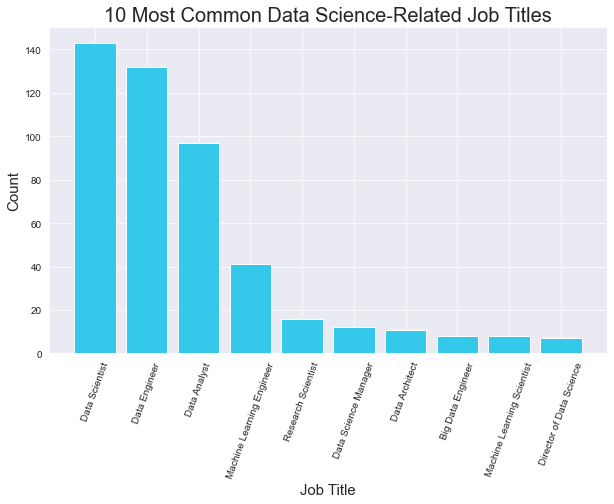

In [26]:
plt.figure(figsize=(10,6))
plt.bar(common_job.job_title, common_job.Count, color = '#34c9eb')

plt.xticks(rotation = 70)
plt.title('10 Most Common Data Science-Related Job Titles', fontsize = 20)
plt.xlabel('Job Title', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

In [27]:
all_jobs = df.groupby('job_title').sum(['Count'])
all_jobs = all_jobs['Count'].reset_index()
all_jobs = all_jobs.sort_values(['Count'], ascending = False)

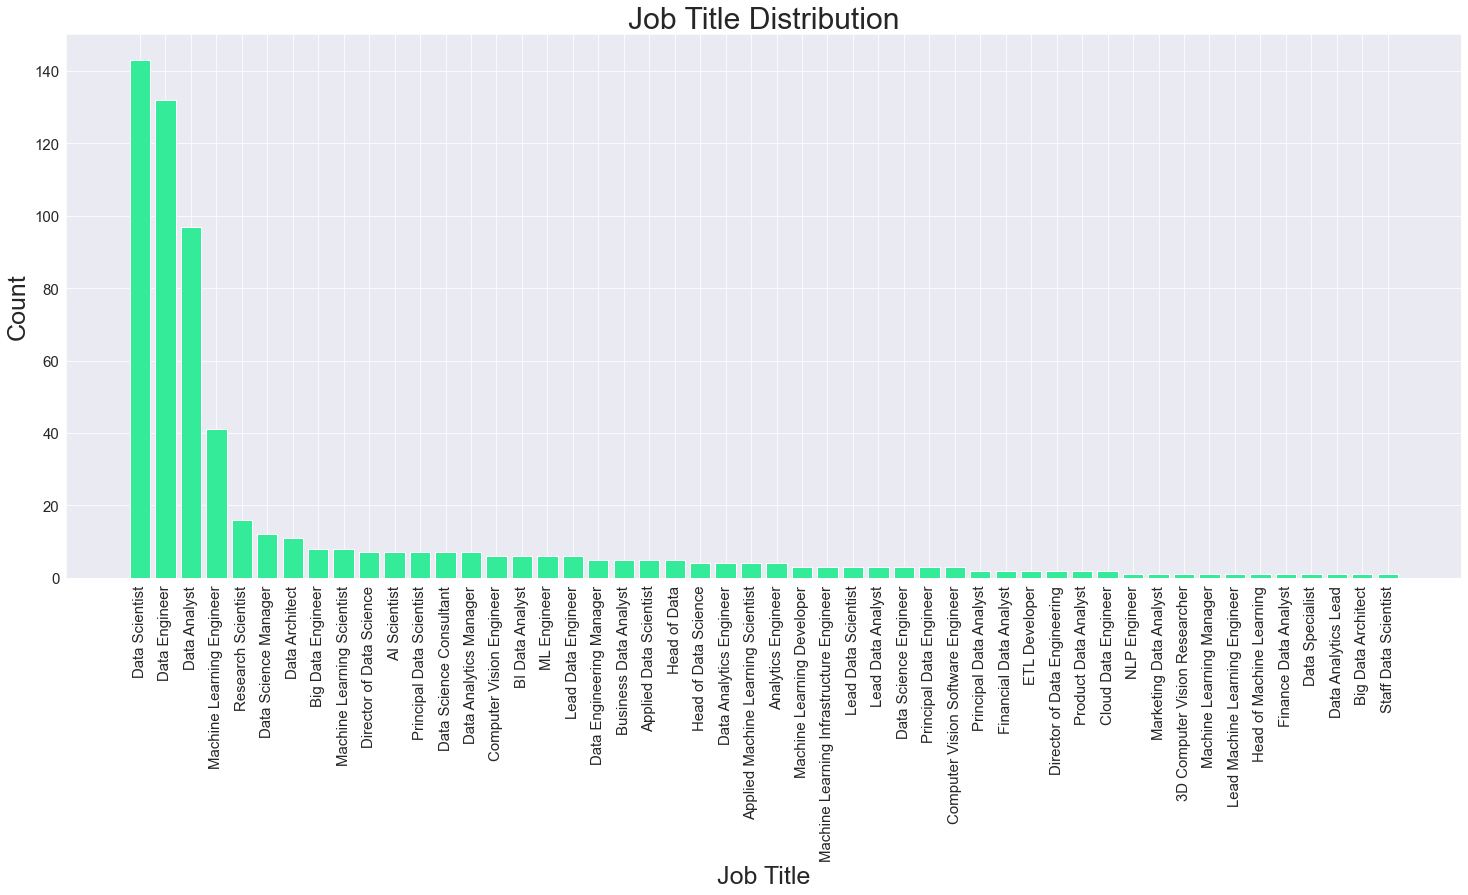

In [28]:
plt.figure(figsize=(25,10))
plt.bar(all_jobs.job_title, all_jobs.Count, color = '#34eb99')

plt.xticks(rotation = 'vertical', fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Job Title Distribution', fontsize = 30)
plt.xlabel('Job Title', fontsize = 25)
plt.ylabel('Count', fontsize = 25)

plt.show()

**Key takeaways:** From the bar chart above, 'Data Scientist', 'Data Engineer', and 'Data Analyst' are most common job titles for data science related occupations. There are 50 total unique job titles, yet these three make up the majority of job listings.

In [29]:
# common_job_sal

common_job_sal = df.groupby('job_title').mean(['salary_in_usd']).reset_index()
common_job_sal = common_job_sal[['job_title', 'salary_in_usd']]
common_job_sal = common_job_sal.iloc[[22, 17, 12, 38, 48, 21, 16, 7, 41, 25]].reset_index()
common_job_sal = common_job_sal.drop(['index'], axis = 1)
common_job_sal

,job_title,salary_in_usd
0,Data Scientist,108187.832168
1,Data Engineer,112725.000000
2,Data Analyst,92893.061856
3,Machine Learning Engineer,104880.146341
4,Research Scientist,109019.500000
5,Data Science Manager,158328.500000
6,Data Architect,177873.909091
7,Big Data Engineer,51974.000000
8,Machine Learning Scientist,158412.500000
9,Director of Data Science,195074.000000


C:\Users\leena\AppData\Local\Temp\ipykernel_1708\2127907080.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(common_job.job_title, rotation = 70, size=8)


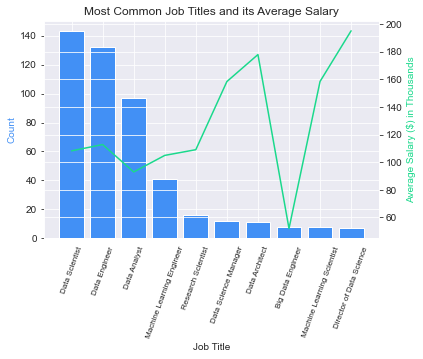

In [30]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(common_job.job_title, common_job.Count, color = '#4290f5')
ax2.plot(common_job.job_title, common_job_sal.salary_in_usd/1000, '#1ad98c')

ax1.set_xlabel('Job Title')
ax1.set_ylabel('Count', color='#4290f5')
ax1.set_xticklabels(common_job.job_title, rotation = 70, size=8)
ax2.set_ylabel('Average Salary ($) in Thousands', color='#1ad98c')
plt.title('Most Common Job Titles and its Average Salary')

plt.show()

**Key Takeaways:** The most common job titles (as in, the top 3 that make up majority of the job listings in the data) do not seem to have the highest average salary. This suggests that these job titles are not necessarily the most common because of its high salary, but based on different factors. 

### 2.  Salary EDA

In [31]:
# top 10 highest salary jobs
salary = df.groupby('job_title').mean().reset_index()
salary = salary[['job_title', 'salary_in_usd']]
salary = salary.sort_values(['salary_in_usd'], ascending = False).reset_index()
salary = salary.drop(['index'], axis=1)
salary.head()

,job_title,salary_in_usd
0,Data Analytics Lead,405000.000000
1,Principal Data Engineer,328333.333333
2,Financial Data Analyst,275000.000000
3,Principal Data Scientist,215242.428571
4,Director of Data Science,195074.000000


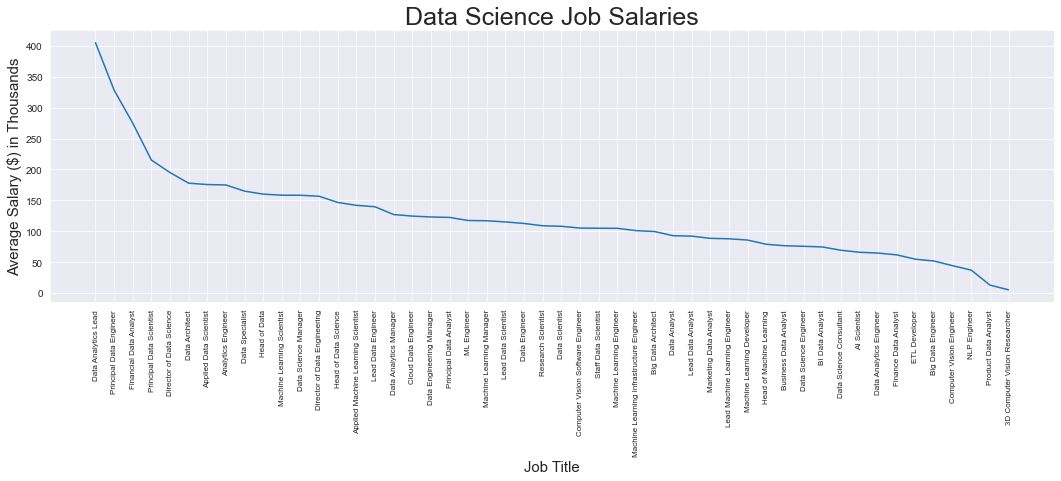

In [32]:
plt.figure(figsize = (18,5))

plt.plot(salary.job_title, salary.salary_in_usd/1000)
plt.xlabel('Job Title', fontsize = 15)
plt.ylabel('Average Salary ($) in Thousands', fontsize = 15)
plt.title('Data Science Job Salaries', fontsize = 25)

plt.xticks(salary.job_title, rotation = 'vertical', fontsize = 8)

plt.show()

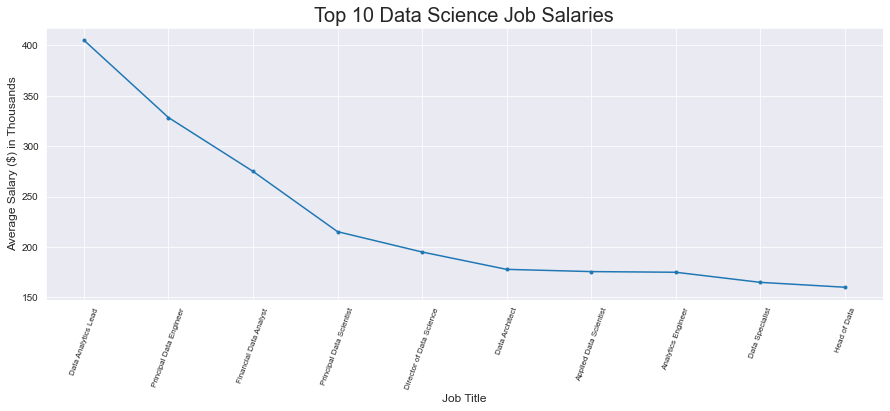

In [33]:
top_salary = salary.head(10)

plt.figure(figsize = (15,5))

plt.plot(top_salary.job_title, top_salary.salary_in_usd/1000, '.-')
plt.xlabel('Job Title', fontsize = 12)
plt.ylabel('Average Salary ($) in Thousands', fontsize = 12)
plt.title('Top 10 Data Science Job Salaries', fontsize = 20)

plt.xticks(top_salary.job_title, rotation = 70, fontsize = 8)

plt.show()


**Key Takeaways:** Data Analytics Lead, Principal Data Engineer, and Financial Data Analyst hold the highest average salary job titles